In [1]:
"""
Student Score Prediction Project Summary

- Goal: Predict students' exam scores focusing primarily on study hours.

- Data Exploration and Cleaning:
  * Loaded dataset and examined structure with .info(), .shape, .describe().
  * Checked and handled missing and duplicate values.
  * Cleaned data by dropping missing values and addressing outliers in numeric and categorical columns.

- Data Analysis:
  * Analyzed relationships between numeric features and exam scores, including correlations.
  * Explored distributions of numeric variables.
  * Investigated categorical features’ impact on exam scores using group means and value counts.

- Modeling:
  * Built Linear Regression and Polynomial Regression (degree=2) models.
  * Started modeling using only study hours.
  * Extended to a subset of relevant features to improve predictions.
  * Finally, used all features to maximize accuracy.

- Evaluation and Comparison:
  * Split data into training and test sets.
  * Evaluated models with MSE, RMSE, and R² score.
  * Compared linear vs. polynomial regression to assess best fit.

- Visualization:
  * Visualized feature distributions, correlations, and regression fits to support insights and evaluation.
"""


"\nStudent Score Prediction Project Summary\n\n- Goal: Predict students' exam scores focusing primarily on study hours.\n\n- Data Exploration and Cleaning:\n  * Loaded dataset and examined structure with .info(), .shape, .describe().\n  * Checked and handled missing and duplicate values.\n  * Cleaned data by dropping missing values and addressing outliers in numeric and categorical columns.\n\n- Data Analysis:\n  * Analyzed relationships between numeric features and exam scores, including correlations.\n  * Explored distributions of numeric variables.\n  * Investigated categorical features’ impact on exam scores using group means and value counts.\n\n- Modeling:\n  * Built Linear Regression and Polynomial Regression (degree=2) models.\n  * Started modeling using only study hours.\n  * Extended to a subset of relevant features to improve predictions.\n  * Finally, used all features to maximize accuracy.\n\n- Evaluation and Comparison:\n  * Split data into training and test sets.\n  * Ev

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Read and Explore The Dataset

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.shape

(6607, 20)

# Perform data cleaning and basic visualization to understand the datase

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Handle Missing Values

In [10]:
df.dropna(subset=['Parental_Education_Level','Distance_from_Home','Teacher_Quality'],inplace = True)

In [11]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [12]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [13]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [14]:
num_col = df.select_dtypes(include="number")
num_col.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [15]:
Q1 = df[num_col.columns].quantile(0.25)
Q3 = df[num_col.columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((df[num_col.columns] < lower_bound) | 
            (df[num_col.columns] > upper_bound))

for col in num_col.columns:
    print(f"--- {col} ---")
    print(f"Q1: {Q1[col]}")
    print(f"Q3: {Q3[col]}")
    print(f"IQR: {IQR[col]}")
    print(f"Lower Bound: {lower_bound[col]}")
    print(f"Upper Bound: {upper_bound[col]}")
    print(f"Outlier Count: {outliers[col].sum()}")
    print()


--- Hours_Studied ---
Q1: 16.0
Q3: 24.0
IQR: 8.0
Lower Bound: 4.0
Upper Bound: 36.0
Outlier Count: 40

--- Attendance ---
Q1: 70.0
Q3: 90.0
IQR: 20.0
Lower Bound: 40.0
Upper Bound: 120.0
Outlier Count: 0

--- Sleep_Hours ---
Q1: 6.0
Q3: 8.0
IQR: 2.0
Lower Bound: 3.0
Upper Bound: 11.0
Outlier Count: 0

--- Previous_Scores ---
Q1: 63.0
Q3: 88.0
IQR: 25.0
Lower Bound: 25.5
Upper Bound: 125.5
Outlier Count: 0

--- Tutoring_Sessions ---
Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
Outlier Count: 423

--- Physical_Activity ---
Q1: 2.0
Q3: 4.0
IQR: 2.0
Lower Bound: -1.0
Upper Bound: 7.0
Outlier Count: 0

--- Exam_Score ---
Q1: 65.0
Q3: 69.0
IQR: 4.0
Lower Bound: 59.0
Upper Bound: 75.0
Outlier Count: 103



In [16]:
for col in num_col.columns:
    if ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).any():
        df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [17]:
for col in num_col.columns:
    print(col, df[col].min(), df[col].max())

Hours_Studied 4 36
Attendance 60 100
Sleep_Hours 4 10
Previous_Scores 50 100
Tutoring_Sessions 0.0 3.5
Physical_Activity 0 6
Exam_Score 59 75


In [18]:
df.shape

(6378, 20)

## Check Outliers After Handing Them Using Boxplot

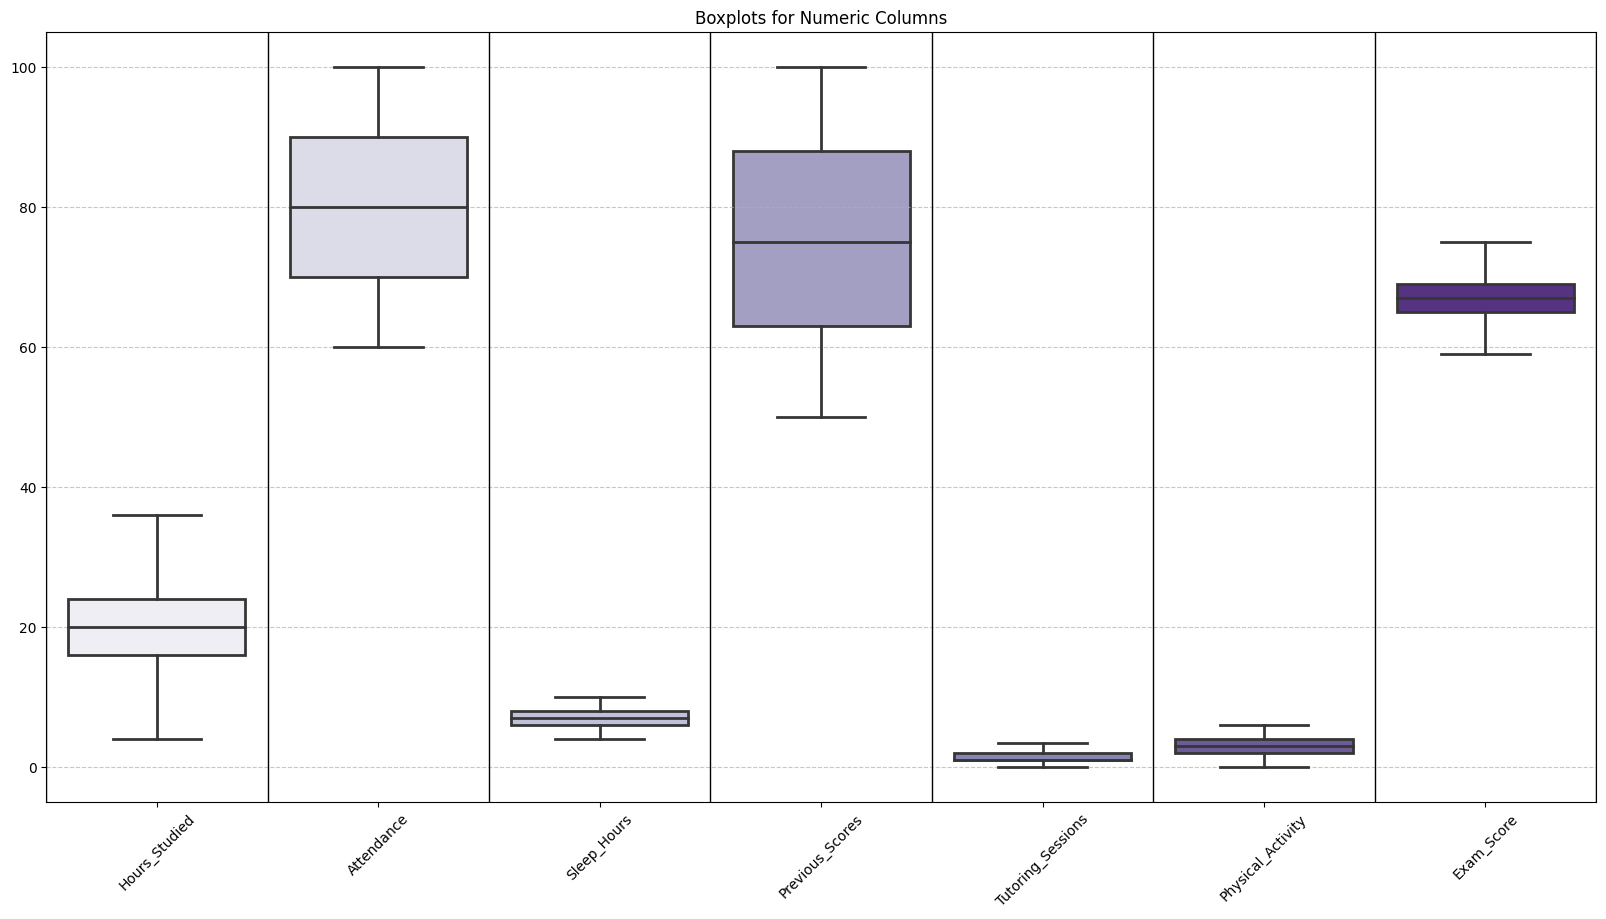

In [19]:
# After Handling Outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[num_col.columns], linewidth=2, fliersize=4,palette = 'Purples') 
plt.xticks(rotation=45)
plt.title("Boxplots for Numeric Columns")

plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(num_col.columns) + 1):  
    plt.axvline(i - 0.5, color='black', linewidth=1)

plt.show()


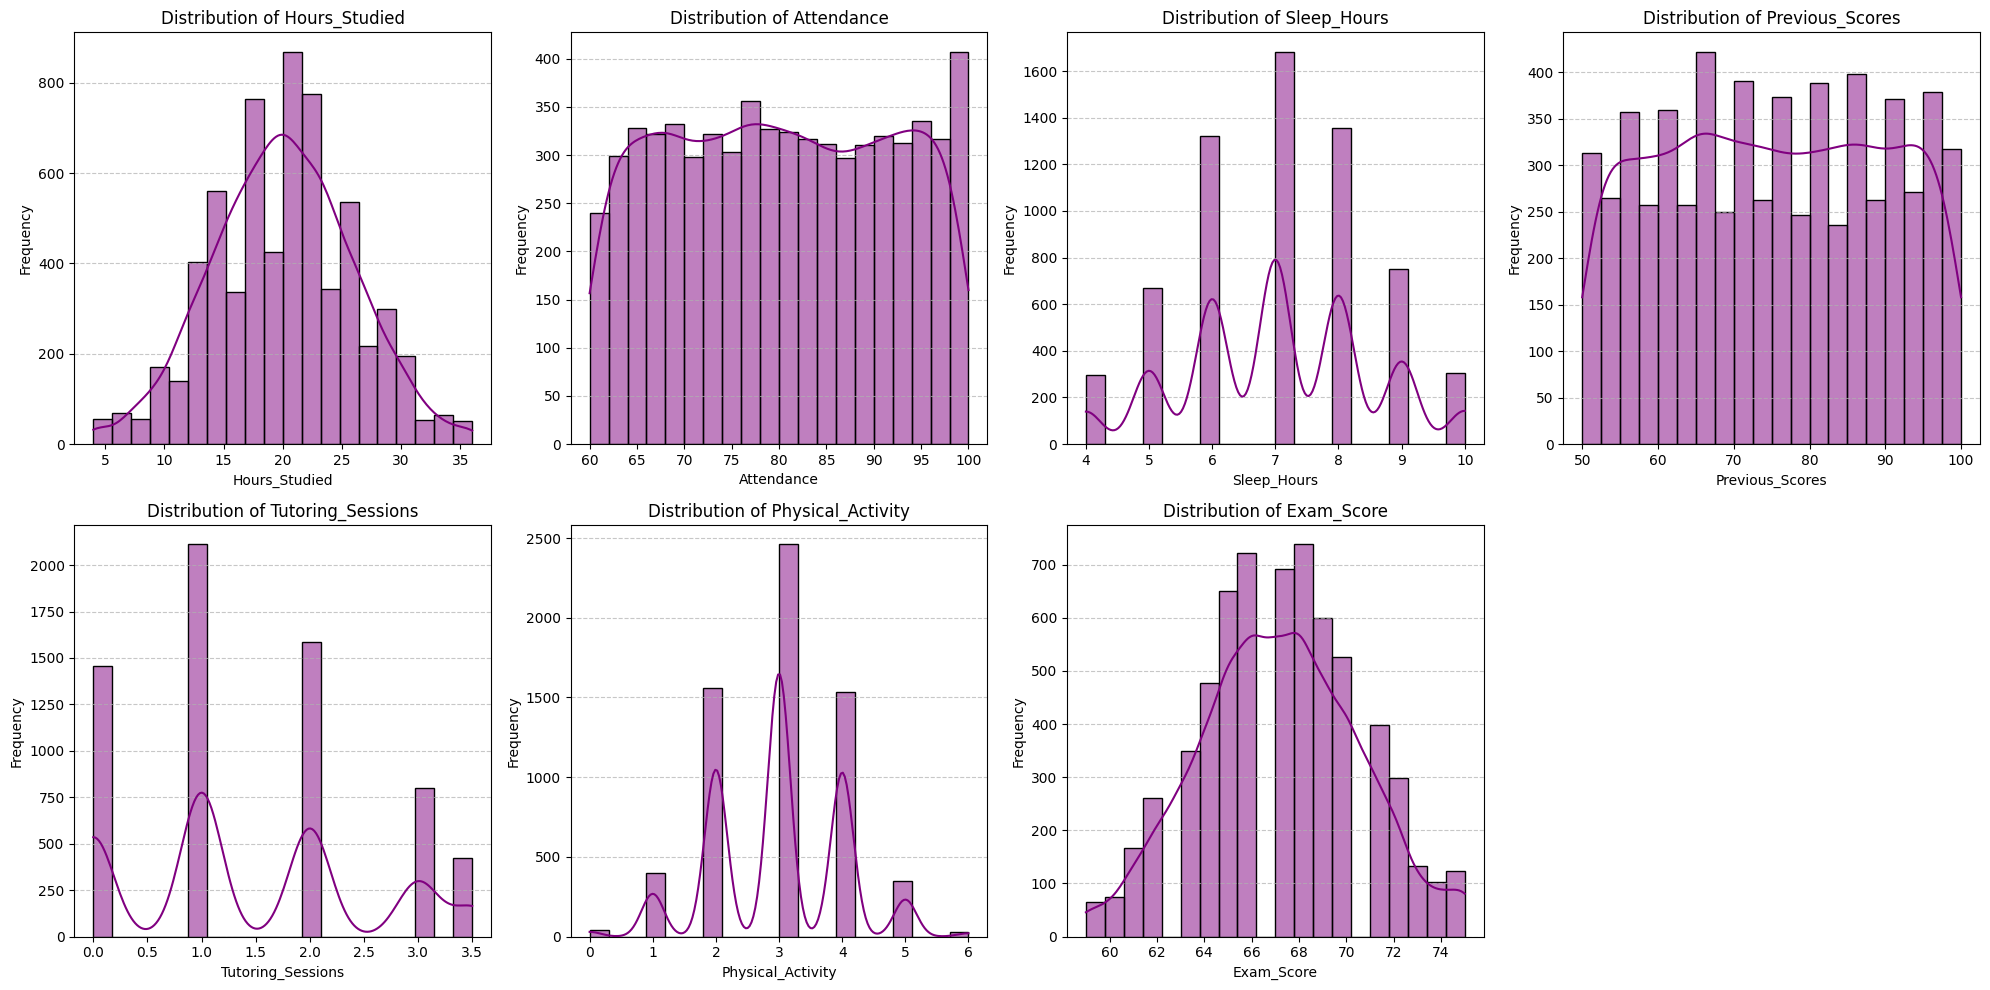

In [20]:
# Distributions Of Numerical Features
numeric_columns = num_col.columns
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, (len(numeric_columns) + 1) // 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='purple')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlations Between Numerical Features')

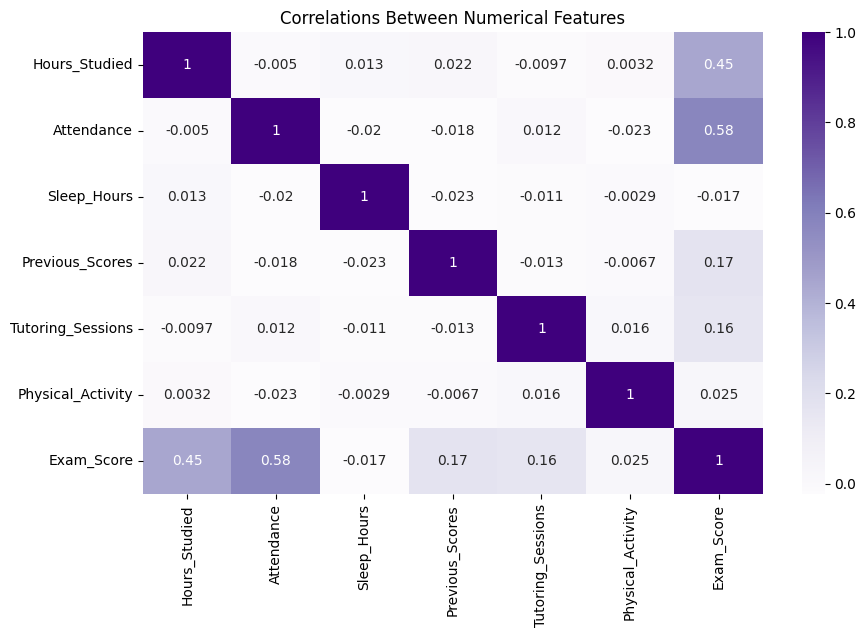

In [21]:
plt.figure(figsize=(10,6))
corr = num_col.corr()
sns.heatmap(corr,annot= True, cmap = 'Purples')
plt.title('Correlations Between Numerical Features')

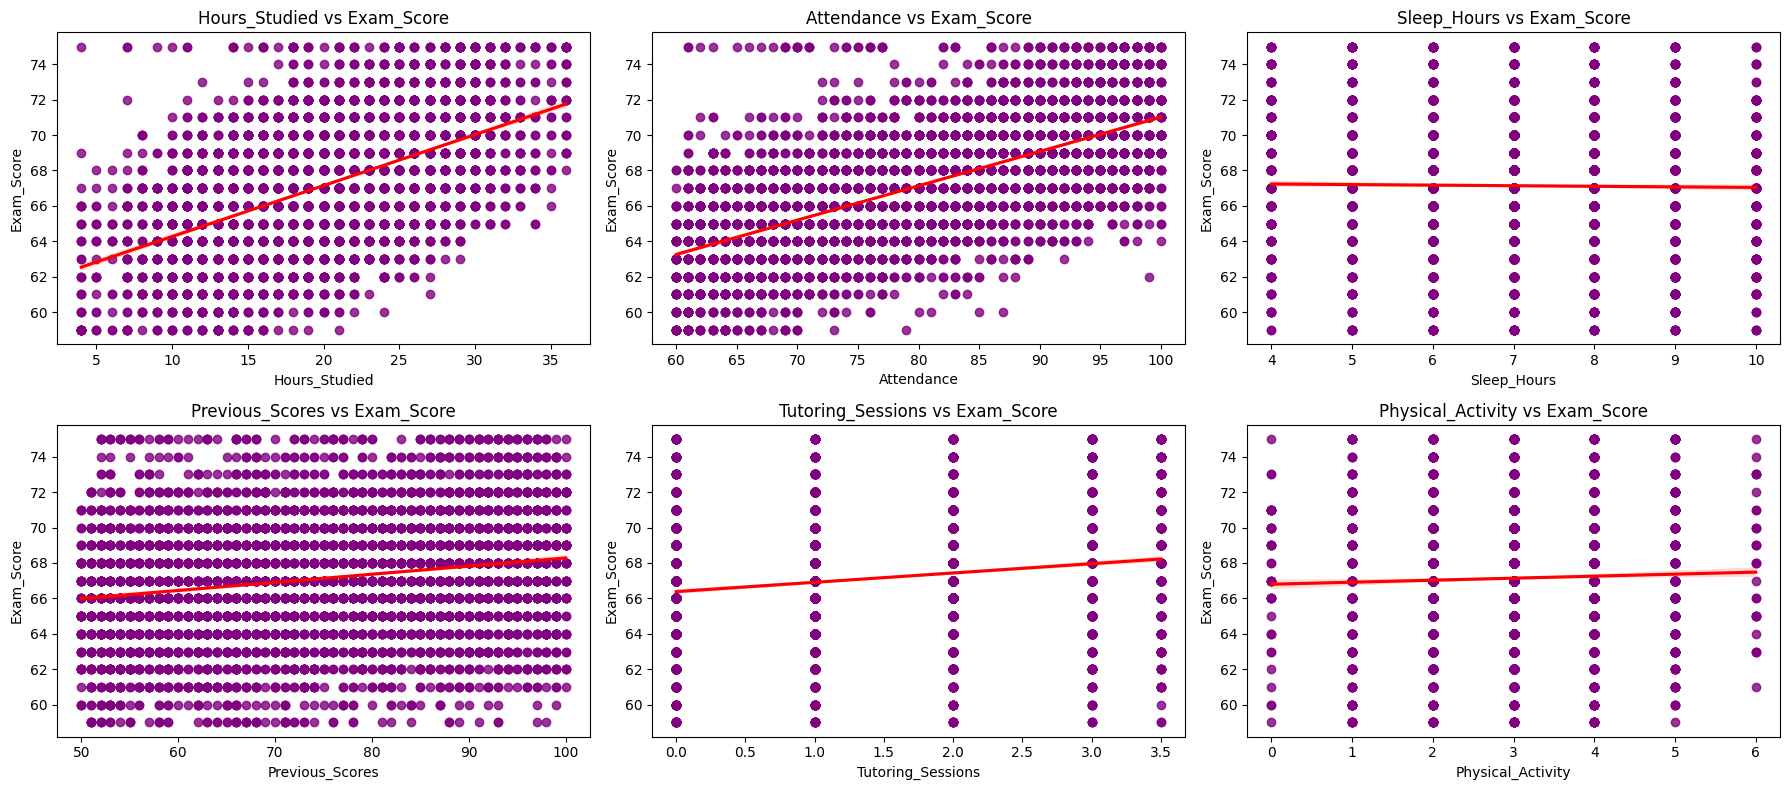

In [22]:
# Check Relations between features and Target Values
target_col = 'Exam_Score'
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != target_col]

ncols = 3
nrows = -(-len(numeric_cols) // ncols) 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.regplot(
        x=col, 
        y=target_col, 
        data=df, 
        ax=axes[i], 
        line_kws={'color':'red'},
        color = 'purple'
    )
    axes[i].set_title(f"{col} vs {target_col}")
    
# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### The data becomes clean from missing,duplicates and outliers  
### Ths features Have more Effect on Target (Exam_Score) are (Attendence/Hourse_Studied/Previous_Scores)

## Explore Categorical Columns

In [23]:
cat_col =  df.select_dtypes(include="object")
cat_col.columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [24]:
for col in cat_col.columns:
    print(f"=== {col} ===")
    print(df[col].value_counts())
    print()


=== Parental_Involvement ===
Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

=== Access_to_Resources ===
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

=== Extracurricular_Activities ===
Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

=== Motivation_Level ===
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

=== Internet_Access ===
Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

=== Family_Income ===
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

=== Teacher_Quality ===
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

=== School_Type ===
School_Type
Public     4434
Private    1944
Name: count, dtype: int64

=== Peer_Influence ===
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64

=== Learning_

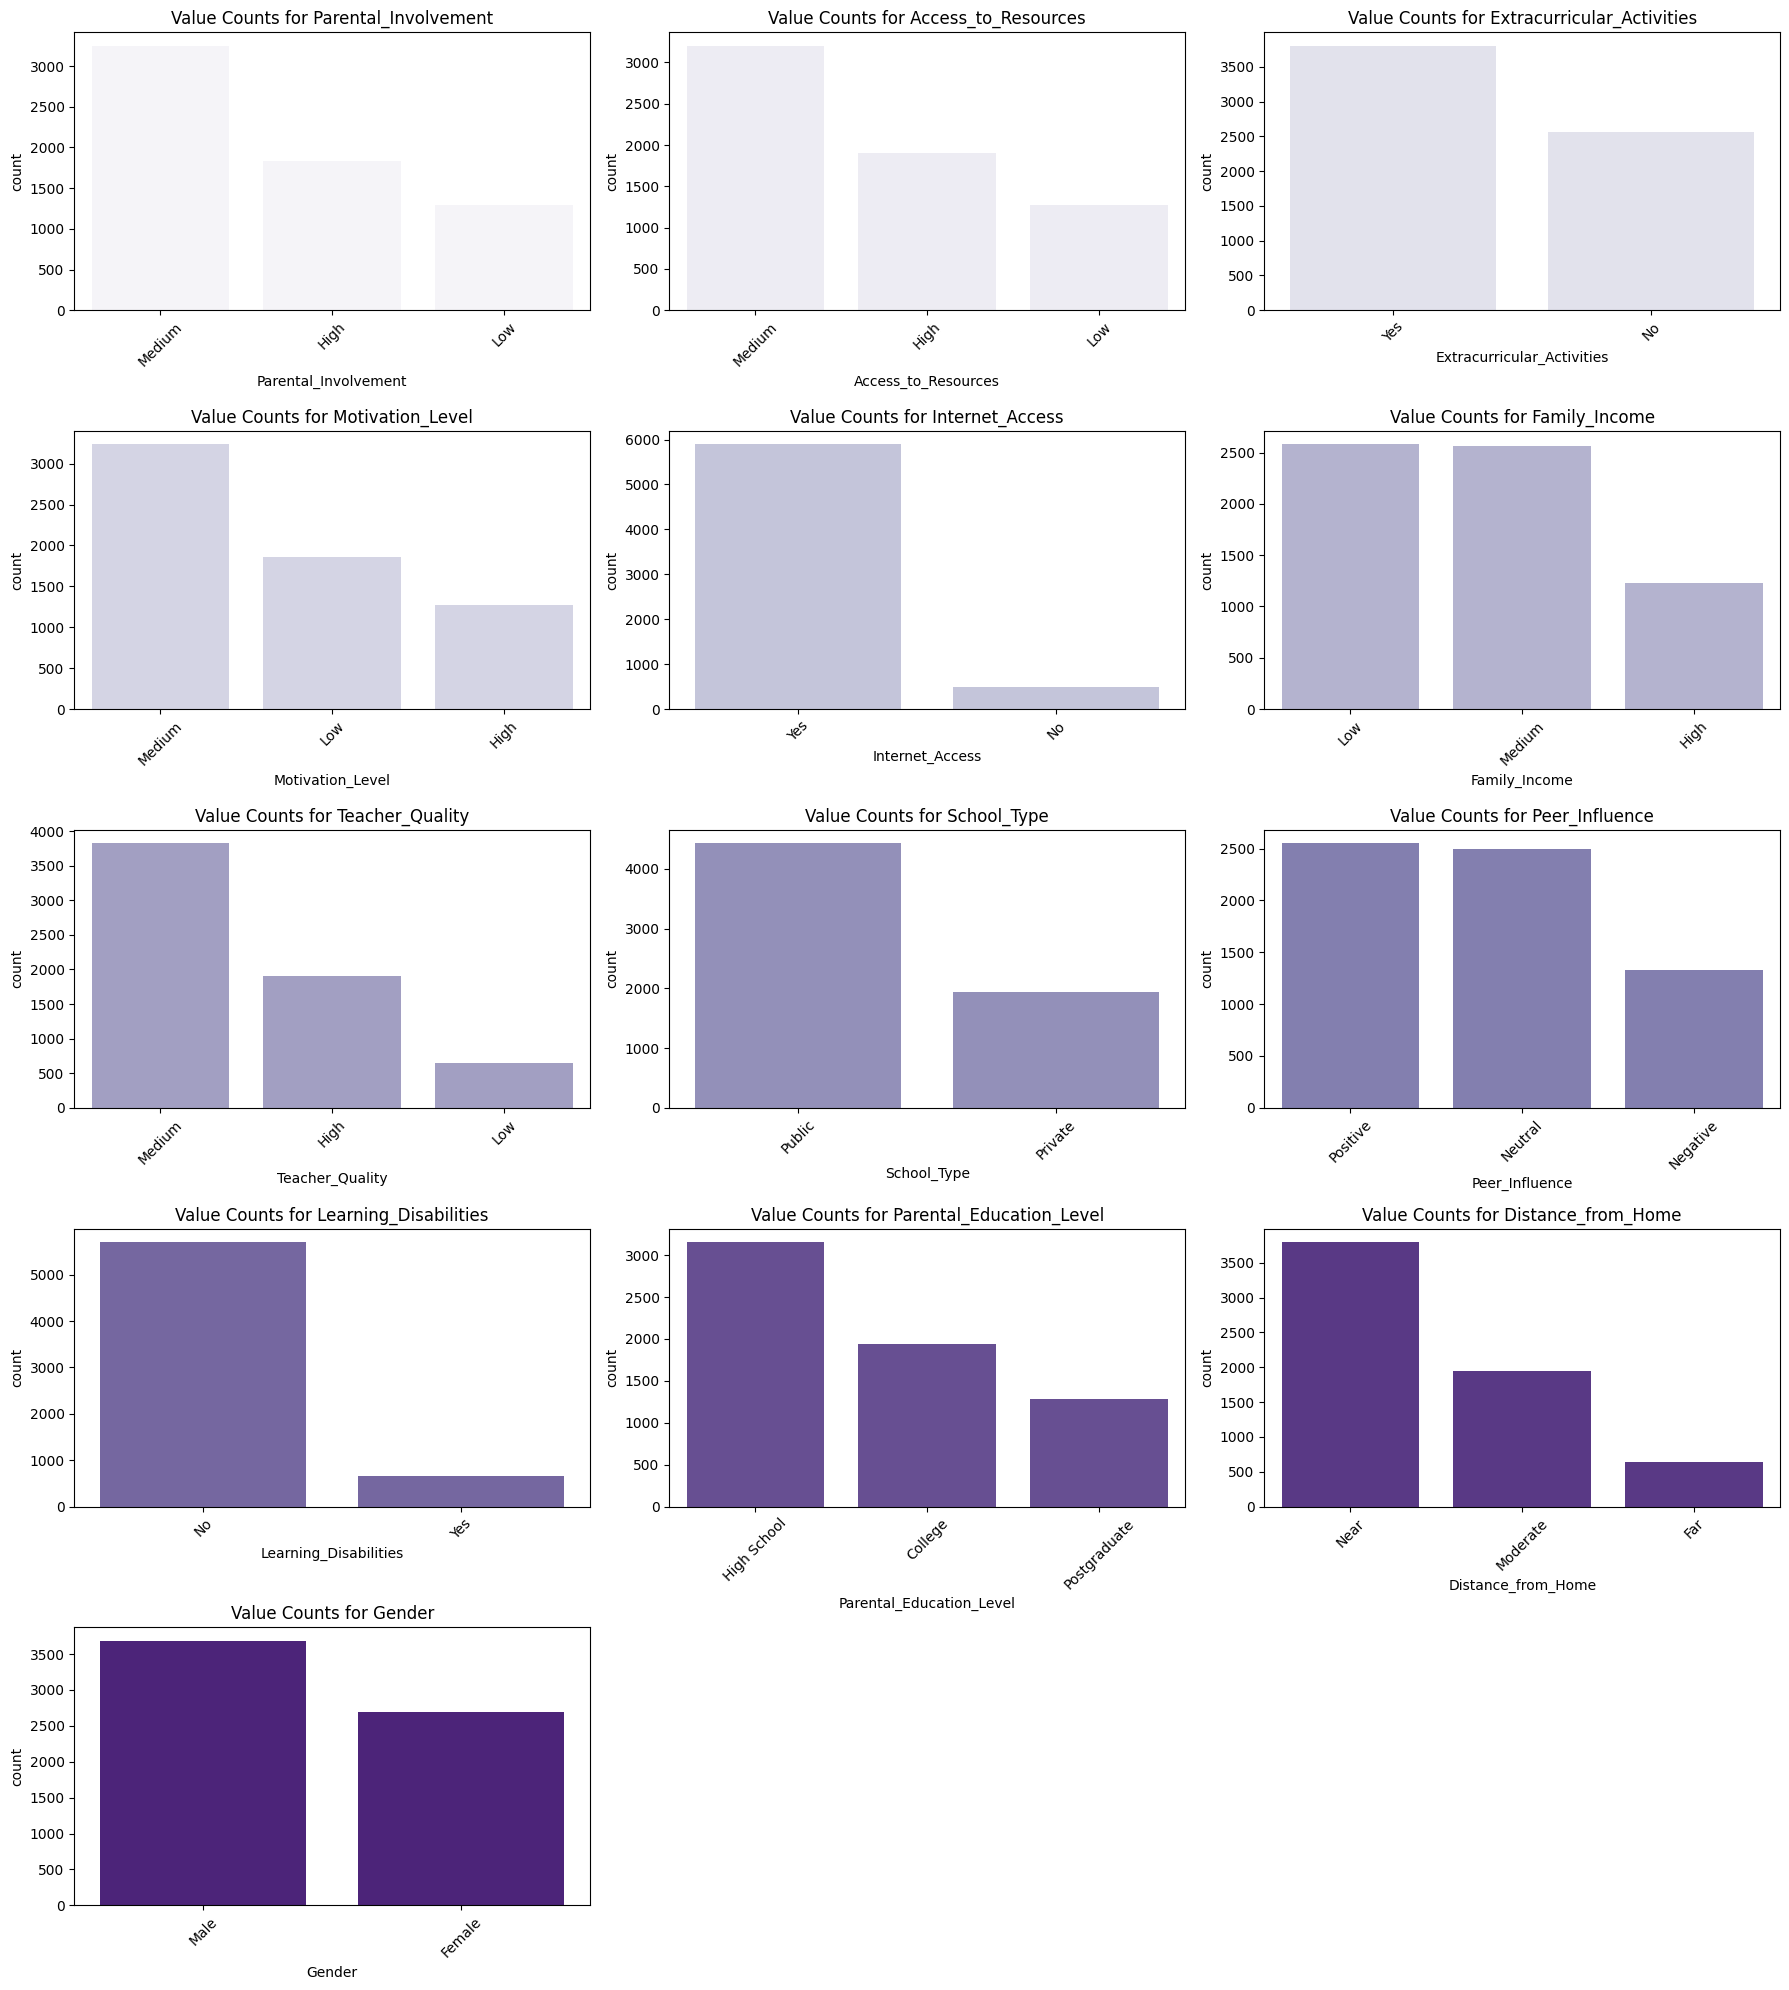

In [25]:
import math
palette = sns.color_palette("Purples", len(cat_col.columns))
n_cols = 3
n_rows = math.ceil(len(cat_col.columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6*n_cols, 4*n_rows))

# flatten axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(cat_col.columns):
    sns.countplot(ax=axes[i], data=df, x=col, order=df[col].value_counts().index, color=palette[i])
    axes[i].set_title(f"Value Counts for {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## Handling Data Types

In [26]:
df[['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']] = (df[['Extracurricular_Activities',
'Internet_Access', 'Learning_Disabilities']].replace({'Yes': True, 'No': False}))

In [27]:
df.dtypes

Hours_Studied                   int64
Attendance                      int64
Parental_Involvement           object
Access_to_Resources            object
Extracurricular_Activities       bool
Sleep_Hours                     int64
Previous_Scores                 int64
Motivation_Level               object
Internet_Access                  bool
Tutoring_Sessions             float64
Family_Income                  object
Teacher_Quality                object
School_Type                    object
Peer_Influence                 object
Physical_Activity               int64
Learning_Disabilities            bool
Parental_Education_Level       object
Distance_from_Home             object
Gender                         object
Exam_Score                      int64
dtype: object

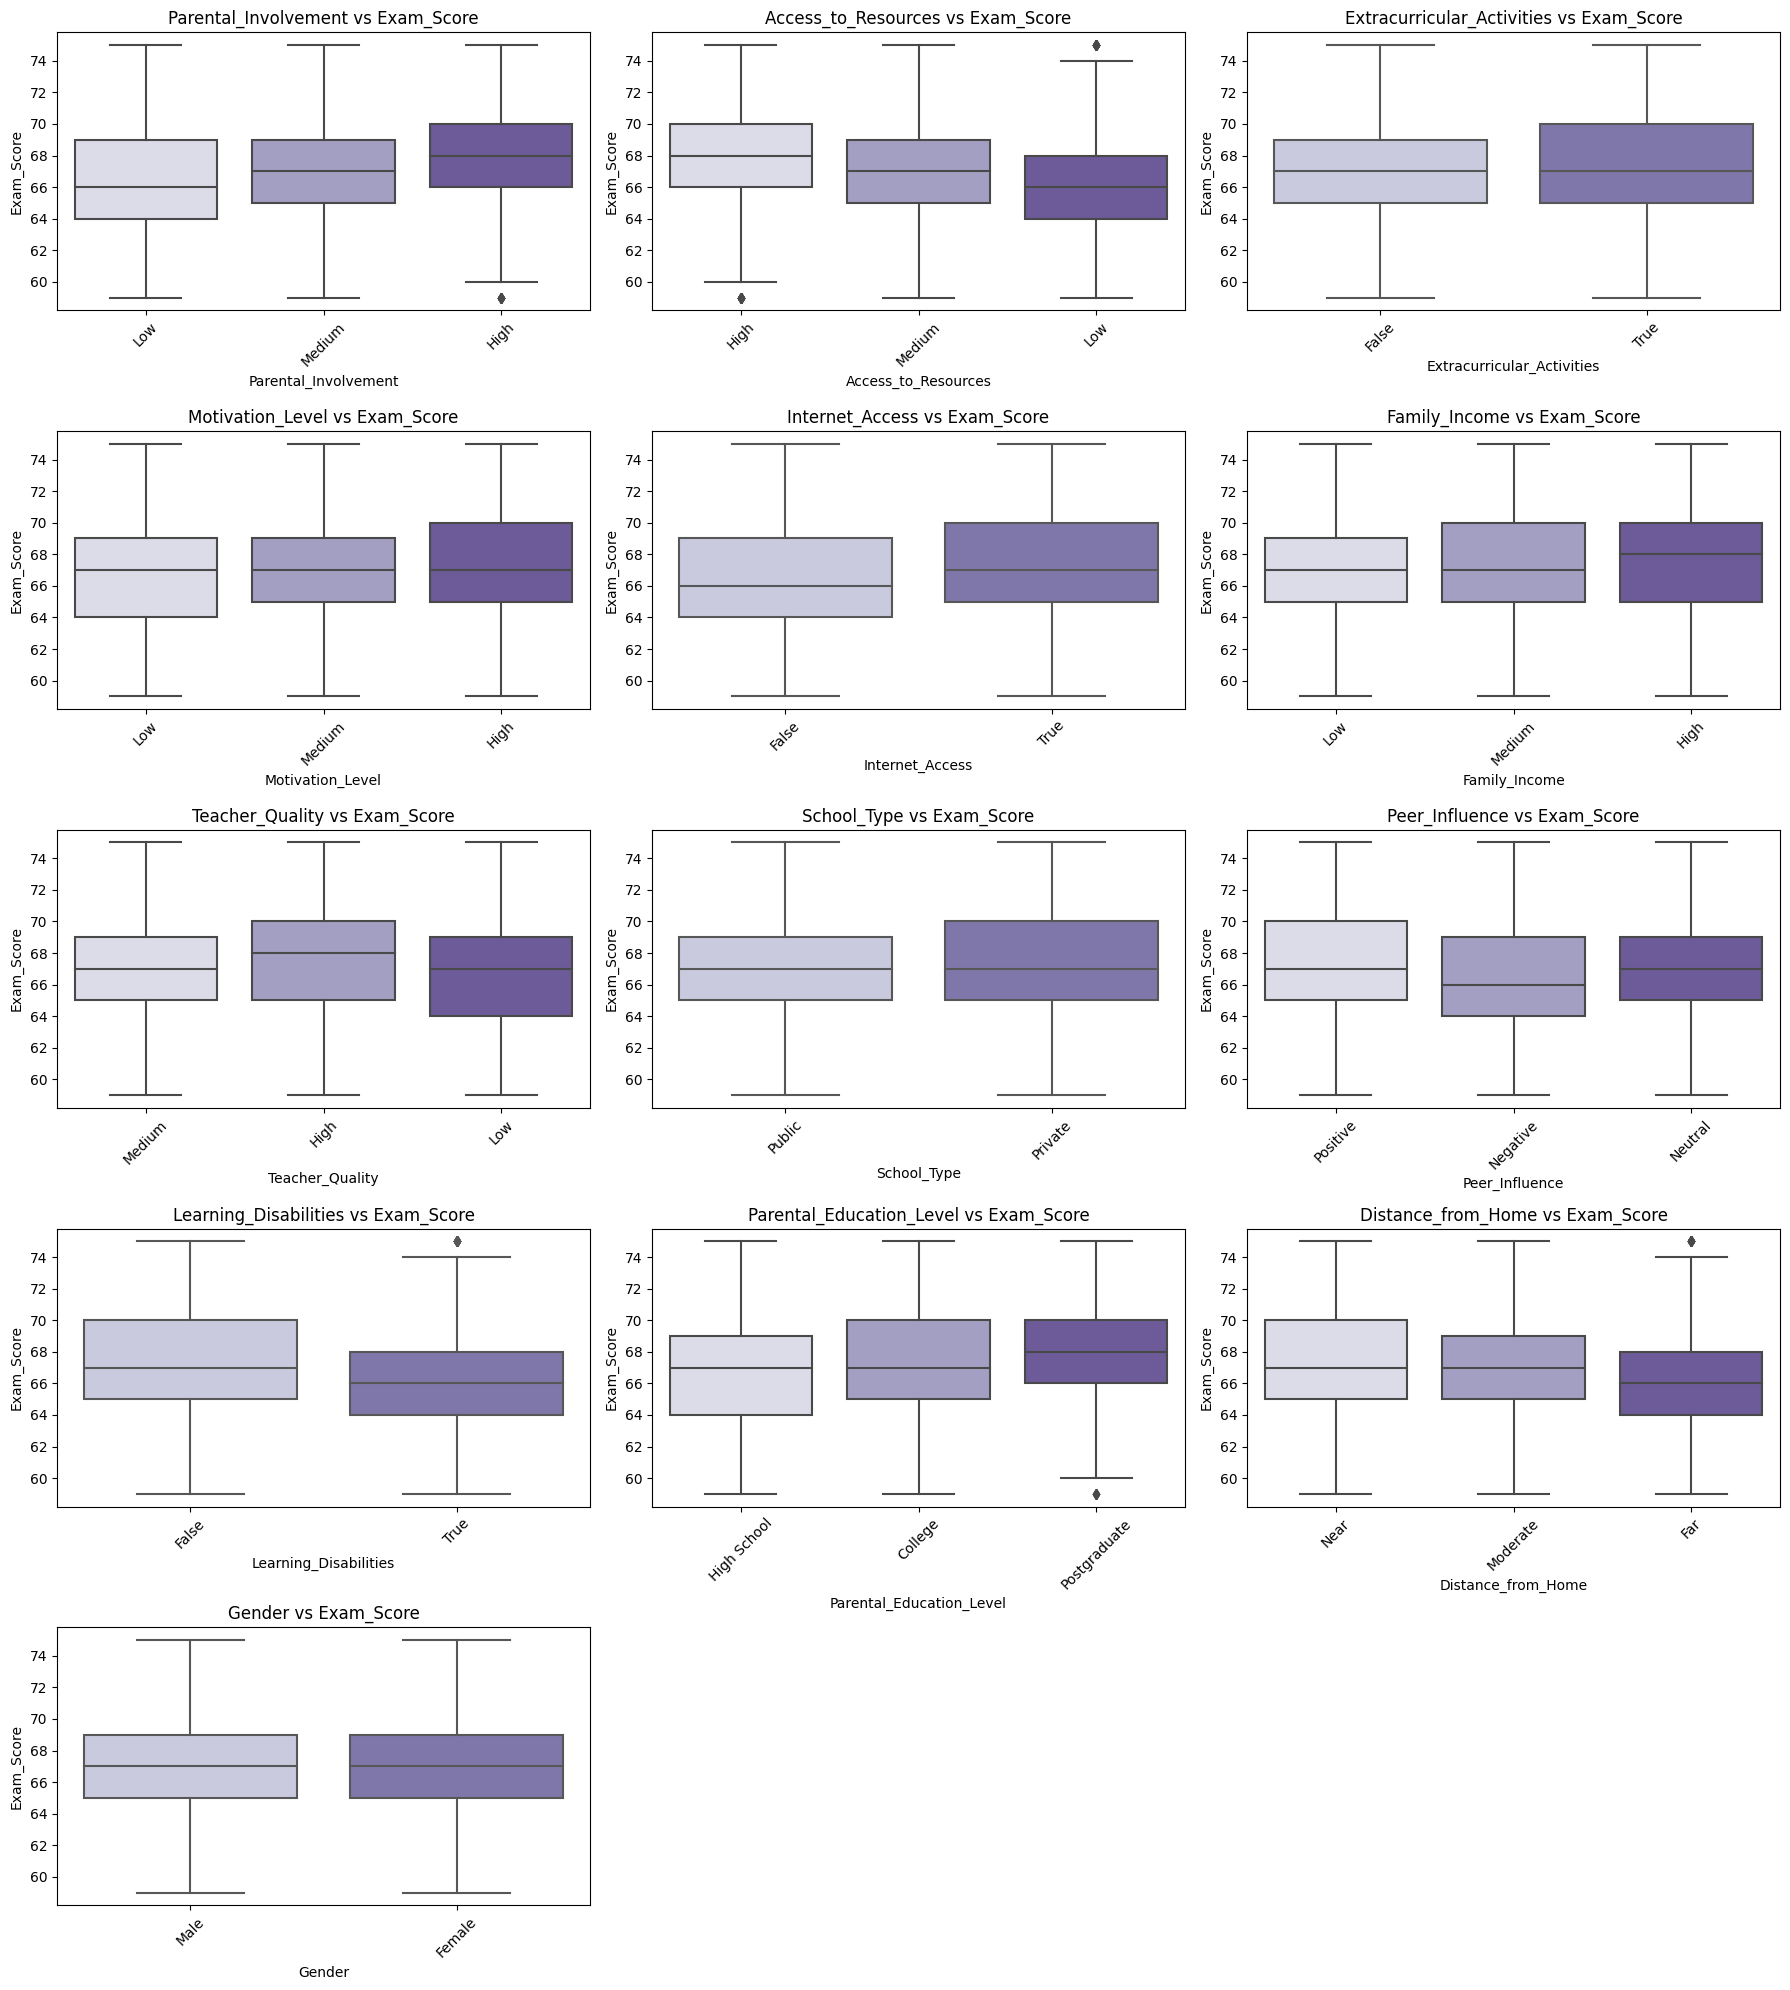

In [28]:
target_col = 'Exam_Score'
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

ncols = 3
nrows = -(-len(categorical_cols) // ncols) 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y=target_col, data=df, ax=axes[i], palette="Purples")
    axes[i].set_title(f"{col} vs {target_col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### The categorical data are cleaned and have not outliers with Exam_Score(Target)

## Relation Between Hours Studied & Target

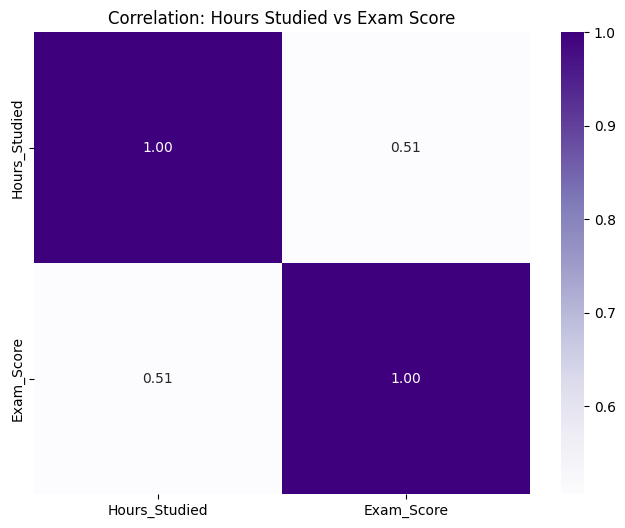

In [29]:

plt.figure(figsize=(8,6))
sns.heatmap(df[['Hours_Studied', 'Exam_Score']].corr(), annot=True, cmap='Purples', fmt=".2f")
plt.title("Correlation: Hours Studied vs Exam Score")
plt.show()


# Preprocessing for Regression Model using only Hours_Studied as feature

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
# split data
X = df["Hours_Studied"]
y = df["Exam_Score"]
X = X.values.reshape(-1, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# scale feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   
X_test = scaler.transform(X_test)        

# Linear Regression Model 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# train model
model = LinearRegression()
model.fit(X_train ,y_train)

# predict
y_pred_linear = model.predict(X_test)         
y_train_pred_linear = model.predict(X_train)  



# evaluate on train
mse_train = mean_squared_error(y_train, y_train_pred_linear)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_linear)



# evaluate on test
mse_test = mean_squared_error(y_test, y_pred_linear)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_linear)




print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}") 

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")    

Train MSE: 8.48
Train RMSE: 2.91
Train R²: 25.39%
Test MSE: 8.60
Test RMSE: 2.93
Test R²: 26.39%


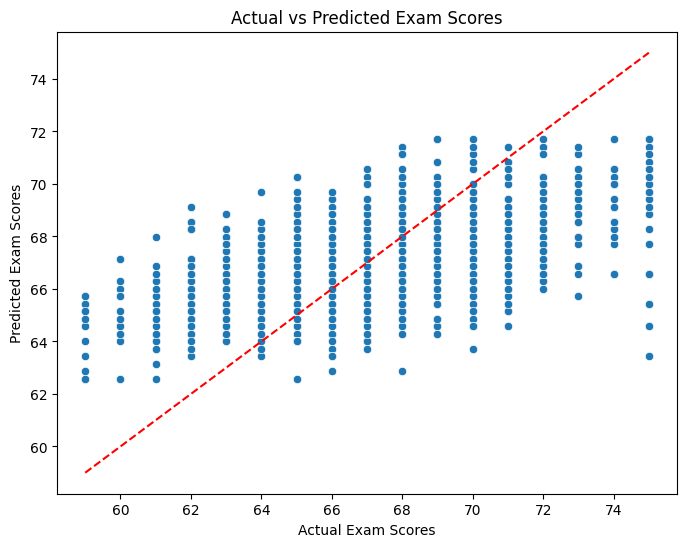

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.show()


# Polynomial Regression Model

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# predict
y_pred_train_poly = model.predict(X_train_poly) 
y_pred_test_poly = model.predict(X_test_poly)    

# evaluate on train
mse_train = mean_squared_error(y_train, y_pred_train_poly)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_poly)

# evaluate on test
mse_test = mean_squared_error(y_test, y_pred_test_poly)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_poly)

print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}") 

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")



Train MSE: 8.48
Train RMSE: 2.91
Train R²: 25.42%
Test MSE: 8.60
Test RMSE: 2.93
Test R²: 26.40%


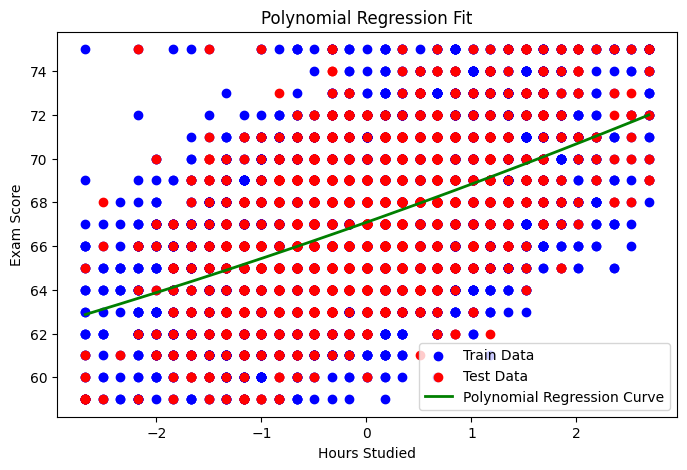

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

X_curve = np.linspace(min(X_train), max(X_train), 200).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='green', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

# Comparison between linear and Polynomial Regression using one feature

In [39]:
# For Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# For Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_test_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_test_poly)

# Compare results
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree=2)'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'R² Score': [r2_linear, r2_poly]
})

comparison_df

,Model,MSE,RMSE,R² Score
0,Linear Regression,8.603268,2.933133,0.263901
1,Polynomial Regression (degree=2),8.602092,2.932932,0.264001


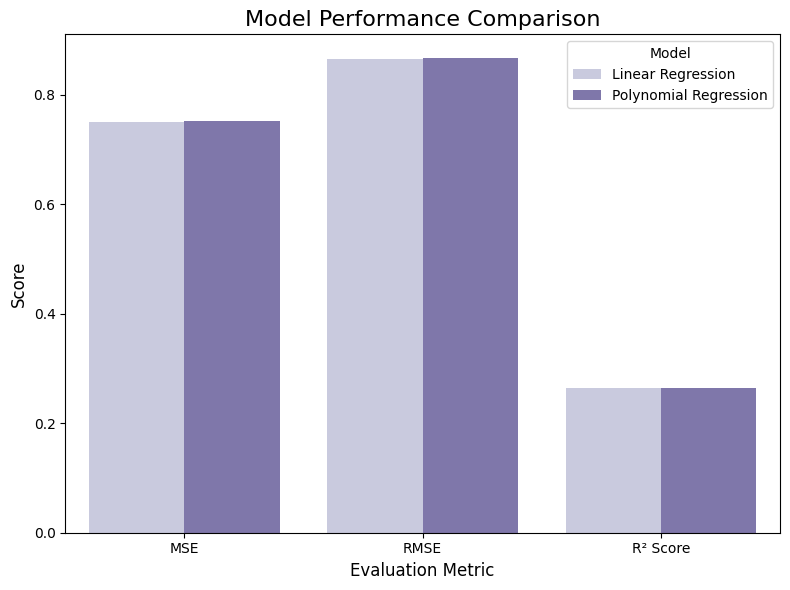

In [40]:
# Linear Regrssion

mse_linear = 0.75   
rmse_linear = np.sqrt(mse_linear)
r2_linear = 0.263901

# Polynomial Regression
mse_poly = 0.752514
rmse_poly = np.sqrt(mse_poly)
r2_poly = 0.264001

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'R² Score': [r2_linear, r2_poly]
})

## Uses melt so Seaborn can easily plot multiple metrics side-by-side ##
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')


plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model', palette='Purples')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


### when use polynomial dosn't affect on accuracy this mean data is linear almost

# Try model with different feature combinations 

In [41]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [42]:
X = df.drop('Exam_Score',axis = 1)

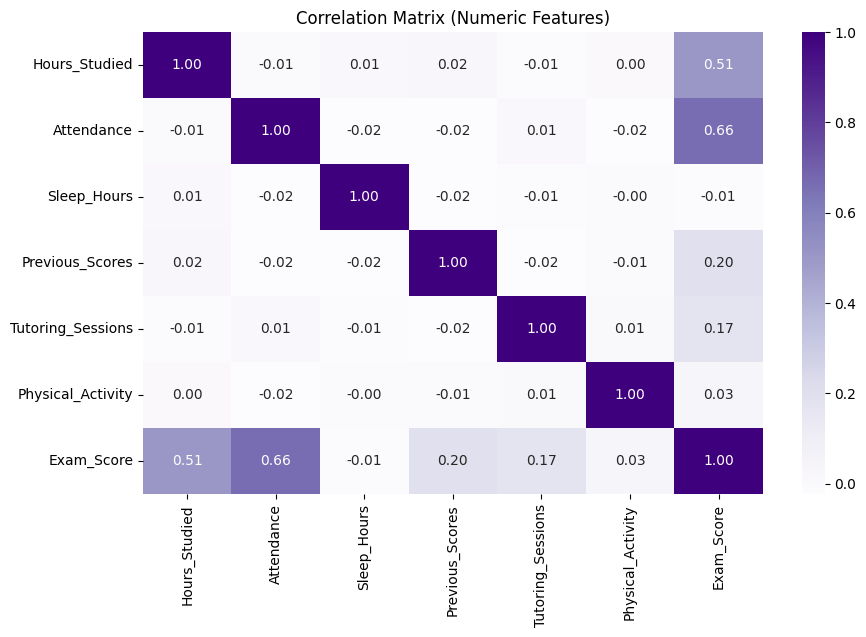

Exam_Score           1.000000
Attendance           0.661918
Hours_Studied        0.505917
Previous_Scores      0.195321
Tutoring_Sessions    0.170314
Physical_Activity    0.034674
Sleep_Hours         -0.014030
Name: Exam_Score, dtype: float64


In [43]:
numeric_cols = X.select_dtypes(include=['int64', 'float64'])
numeric_with_target = numeric_cols.copy()
numeric_with_target['Exam_Score'] = df['Exam_Score']

corr_matrix = numeric_with_target.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f" )
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

correlation_with_target = corr_matrix['Exam_Score'].sort_values(ascending=False)
print(correlation_with_target)


# Preprocessing for Regression model using multiple features

In [44]:
# select features and target
X = df[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Sleep_Hours']]
y = df['Exam_Score']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression Model

In [45]:
# train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# predict
y_pred_linear = model.predict(X_test_scaled)         
y_train_pred_linear = model.predict(X_train_scaled)  

# evaluate on test
mse_test = mean_squared_error(y_test, y_pred_linear)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_linear)

# evaluate on train
mse_train = mean_squared_error(y_train, y_train_pred_linear)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_linear)


print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}") 

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")    

Train MSE: 2.65
Train RMSE: 1.63
Train R²: 76.70%
Test MSE: 2.66
Test RMSE: 1.63
Test R²: 77.20%


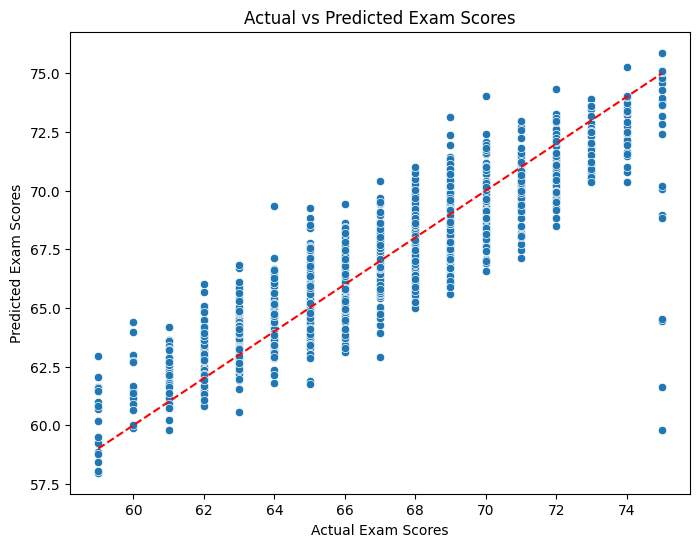

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.show()


# Polynomial Regression Model

In [47]:
# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# predict
y_pred_train_poly = model.predict(X_train_poly) 
y_pred_test_poly = model.predict(X_test_poly)    

# evaluate on train
mse_train = mean_squared_error(y_train, y_pred_train_poly)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_poly)

# evaluate on test
mse_test = mean_squared_error(y_test, y_pred_test_poly)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_poly)

print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}") 

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")



Train MSE: 2.64
Train RMSE: 1.62
Train R²: 76.78%
Test MSE: 2.67
Test RMSE: 1.63
Test R²: 77.16%


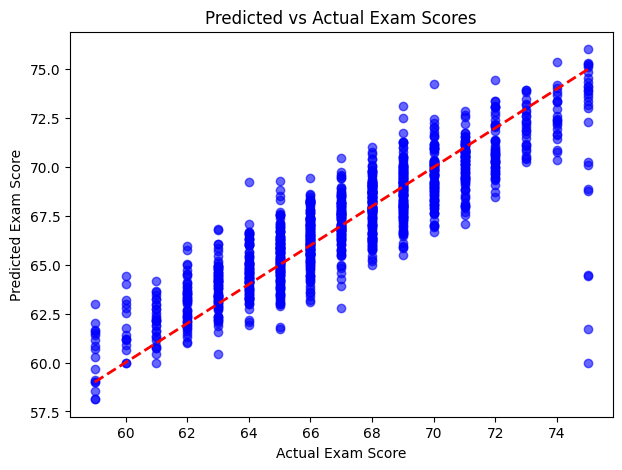

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test_poly, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()


# Comparison between linear and polynomial regression

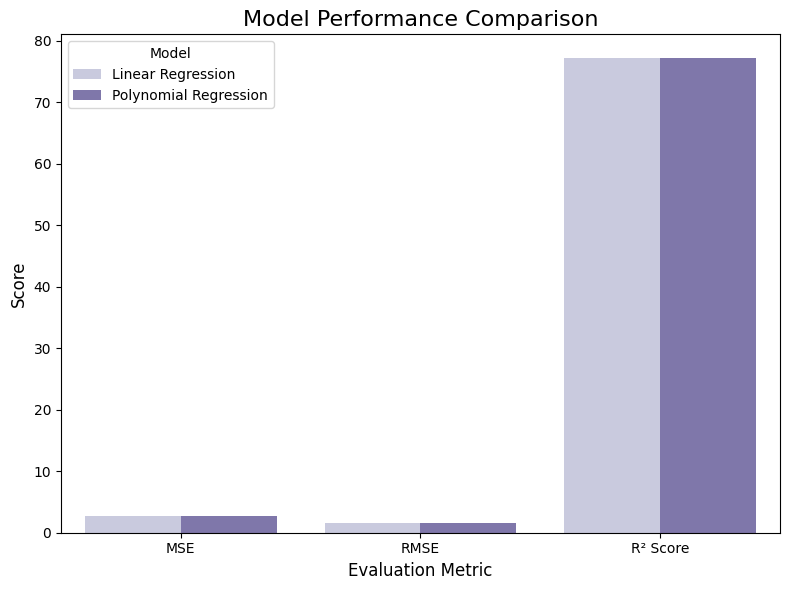

In [49]:
# Linear Regrssion
mse_linear = 2.66  
rmse_linear = np.sqrt(mse_linear)
r2_linear = 77.2

# Polynomial Regression
mse_poly = 2.66
rmse_poly = np.sqrt(mse_poly)
r2_poly = 77.16

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'R² Score': [r2_linear, r2_poly]
})

## Uses melt so Seaborn can easily plot multiple metrics side-by-side ##
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')


plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model', palette='Purples')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


# Preprocessing for Regression Model Using all features

In [50]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,False,7,73,Low,True,0.0,Low,Medium,Public,Positive,3,False,High School,Near,Male,67
1,19,64,Low,Medium,False,8,59,Low,True,2.0,Medium,Medium,Public,Negative,4,False,College,Moderate,Female,61
2,24,98,Medium,Medium,True,7,91,Medium,True,2.0,Medium,Medium,Public,Neutral,4,False,Postgraduate,Near,Male,74
3,29,89,Low,Medium,True,8,98,Medium,True,1.0,Medium,Medium,Public,Negative,4,False,High School,Moderate,Male,71
4,19,92,Medium,Medium,True,6,65,Medium,True,3.0,Medium,High,Public,Neutral,4,False,College,Near,Female,70


In [51]:
# split data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# scale numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# combine scaled numeric + encoded categorical
X_train_final = pd.concat([X_train[numeric_cols], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numeric_cols], X_test_encoded_df], axis=1)

print(X_train_final.shape, X_test_final.shape)


(5102, 40) (1276, 40)


In [52]:
X_train_final.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_False,Learning_Disabilities_True,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
2356,-0.329046,1.297772,-0.032323,1.451922,0.521005,0.998735,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4758,-0.664402,0.778588,0.649136,-1.181929,0.521005,0.032022,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2281,-0.664402,-0.952023,-0.713783,-1.389865,-0.393869,-1.901405,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
485,-1.502793,-1.298145,-0.032323,0.204308,0.521005,0.032022,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4200,0.173988,1.297772,0.649136,-1.251241,-0.393869,0.032022,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Linear Regression Model

In [53]:
# tarin model
model = LinearRegression()
model.fit(X_train_final, y_train)

# Predictions
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)  

# evaluate on train
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# evaluate on test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}") 

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")


Train MSE: 0.80
Train RMSE: 0.89
Train R²: 92.99%
Test MSE: 0.80
Test RMSE: 0.89
Test R²: 93.15%


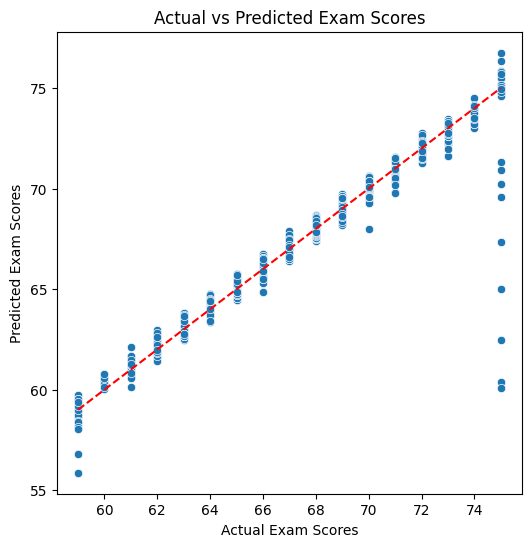

In [54]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.show()

In [55]:
poly = PolynomialFeatures(degree=2)
# transform features
X_train_poly = poly.fit_transform(X_train_final)
X_test_poly = poly.transform(X_test_final)

# train model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict
y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

# evaluate on train
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# evaluate on test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R²: {r2_train:.2%}")

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2%}")


Train MSE: 0.74
Train RMSE: 0.86
Train R²: 93.50%
Test MSE: 0.92
Test RMSE: 0.96
Test R²: 92.12%


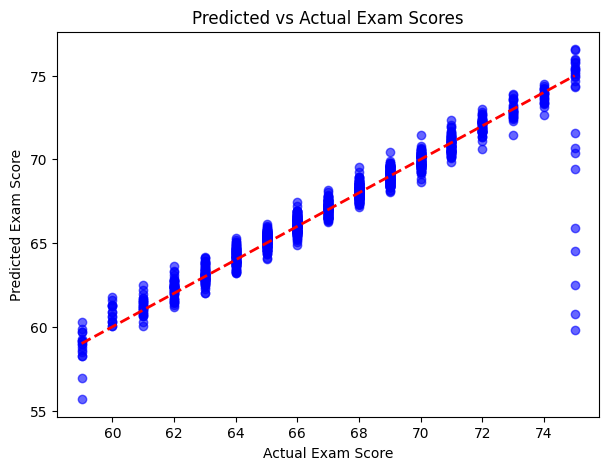

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()


# Comparisons between Linear and Polynomial Regression Model


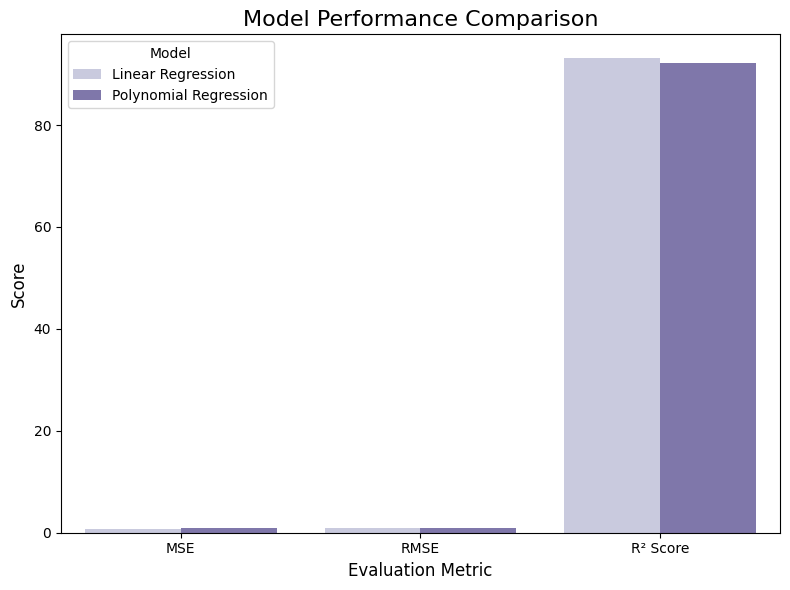

In [57]:
# Linear Regrssion
mse_linear = 0.80
rmse_linear = np.sqrt(mse_linear)
r2_linear = 93.15

# Polynomial Regression
mse_poly = 0.93
rmse_poly = np.sqrt(mse_poly)
r2_poly =92.12

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'R² Score': [r2_linear, r2_poly]
})

## Uses melt so Seaborn can easily plot multiple metrics side-by-side ##
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')


plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model', palette='Purples')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.legend(title="Model")
plt.tight_layout()
plt.show()
